In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, json

In [2]:
info_df = pd.read_csv("Data\superhero_info.csv")
powers_df = pd.read_csv("Data\superhero_powers.csv")

In [3]:
info_df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [4]:
powers_df.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [5]:
#Quick verification of any duplicates or missing values

print(info_df.duplicated().sum())
print(powers_df.duplicated().sum())

0
0


In [6]:
print(info_df.isna().sum().sum())
print(powers_df.isna().sum().sum())

0
0


### Transformation 1 - Separate out Hero & Publisher into two columns

In [7]:
#Split and use expand to create two columns
info_df[['Hero','Publisher']] = info_df['Hero|Publisher'].str.split('|', expand=True)

info_df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [8]:
#Now we can eliminate the original column
info_df = info_df.drop(columns='Hero|Publisher')
info_df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [9]:
#Verify Gender has no incorrect values
info_df['Gender'].value_counts()

Male       321
Female     134
Unknown      8
Name: Gender, dtype: int64

In [10]:
#Verify Race has no incorrect values
info_df['Race'].value_counts()

Human                156
Unknown              145
Mutant                51
Human / Radiation     11
Android                7
Symbiote               7
Alien                  6
Demon                  6
Cyborg                 6
Kryptonian             5
Atlantean              5
Asgardian              5
Inhuman                4
New God                3
Human-Kree             2
Eternal                2
Demi-God               2
Saiyan                 2
Amazon                 2
Human / Altered        2
Metahuman              2
God / Eternal          2
Human-Vulcan           1
Martian                1
Zombie                 1
Korugaran              1
Talokite               1
Clone                  1
Human-Spartoi          1
Animal                 1
Yautja                 1
Human / Cosmic         1
Tamaranean             1
Mutant / Clone         1
Luphomoid              1
Frost Giant            1
Strontian              1
Czarnian               1
Bolovaxian             1
Human-Vuldarian        1


In [11]:
#Verify Alignment has no incorrect values
info_df['Alignment'].value_counts()

good       311
bad        132
neutral     17
Unknown      3
Name: Alignment, dtype: int64

In [12]:
#Verify eye color has no incorrect values
info_df['Eye color'].value_counts()

blue                       182
brown                      102
green                       61
red                         38
Unknown                     17
yellow                      13
black                       12
white                       10
grey                         5
hazel                        5
gold                         3
purple                       3
yellow (without irises)      2
amber                        2
violet                       2
white / red                  1
indigo                       1
silver                       1
green / blue                 1
blue / white                 1
yellow / blue                1
Name: Eye color, dtype: int64

In [13]:
#Verify skin color as no incorrect values
info_df['Skin color'].value_counts()

Unknown       409
green          15
blue            7
red             7
white           5
grey            4
silver          4
purple          3
gold            2
pink            2
yellow          2
black           1
blue-white      1
orange          1
Name: Skin color, dtype: int64

### Transformation 2 - separate out Height and Weight into different columns

In [14]:
#First we need to replace single quotes with doubles quotes for JSON compatibility
info_df['Measurements'] = info_df['Measurements'].str.replace("'",'"')

#Now we can apply the json.loads function to convert it back to a dictionary
info_df['Measurements'] = info_df['Measurements'].apply(json.loads)

info_df['Measurements'].head()

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2     {'Height': '185.0 cm', 'Weight': '90.0 kg'}
3    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
4    {'Height': '193.0 cm', 'Weight': '122.0 kg'}
Name: Measurements, dtype: object

In [15]:
#We can confirm it is indeed now a dictionary by checking a single value
test_measurement = info_df.loc[0,'Measurements']
print(type(test_measurement))
test_measurement

<class 'dict'>


{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [16]:
#Now let's unpack our dictionary into two separate columns

Final_Measurements = info_df['Measurements'].apply(pd.Series)
Final_Measurements

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [17]:
#We can add the 'units' of measure to our column names
#let's remove them from our individual entries so that we can make them integers

Final_Measurements['Height (cm)'] = Final_Measurements['Height'].str.replace(' cm','')
Final_Measurements['Weight (kg)'] = Final_Measurements['Weight'].str.replace(' kg','')

Final_Measurements

,Height,Weight,Height (cm),Weight (kg)
0,203.0 cm,441.0 kg,203.0,441.0
1,191.0 cm,65.0 kg,191.0,65.0
2,185.0 cm,90.0 kg,185.0,90.0
3,203.0 cm,441.0 kg,203.0,441.0
4,193.0 cm,122.0 kg,193.0,122.0
...,...,...,...,...
458,183.0 cm,83.0 kg,183.0,83.0
459,165.0 cm,52.0 kg,165.0,52.0
460,66.0 cm,17.0 kg,66.0,17.0
461,170.0 cm,57.0 kg,170.0,57.0


In [18]:
#Now we can drop our original columns and convert our final columns to floats
Final_Measurements = Final_Measurements.drop(columns=['Height','Weight'])

Final_Measurements['Height (cm)'] = Final_Measurements['Height (cm)'].astype(float)
Final_Measurements['Weight (kg)'] = Final_Measurements['Weight (kg)'].astype(float)

print(Final_Measurements['Height (cm)'].dtype)
print(Final_Measurements['Weight (kg)'].dtype)

Final_Measurements

float64
float64


,Height (cm),Weight (kg)
0,203.0,441.0
1,191.0,65.0
2,185.0,90.0
3,203.0,441.0
4,193.0,122.0
...,...,...
458,183.0,83.0
459,165.0,52.0
460,66.0,17.0
461,170.0,57.0


In [19]:
#Now we can add these columns back to our dataframe and drop the original column
info_df = pd.concat((info_df, Final_Measurements), axis=1)
info_df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics,193.0,122.0


In [20]:
info_df = info_df.drop(columns='Measurements')
info_df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0


In [21]:
#Our info dataframe is now complete, but let's create the appropriate order for our columns

final_info_df = info_df[['Hero','Publisher','Gender','Eye color','Race','Hair color','Height (cm)','Skin color','Alignment','Weight (kg)']]
final_info_df.head()

,Hero,Publisher,Gender,Eye color,Race,Hair color,Height (cm),Skin color,Alignment,Weight (kg)
0,A-Bomb,Marvel Comics,Male,yellow,Human,No Hair,203.0,Unknown,good,441.0
1,Abe Sapien,Dark Horse Comics,Male,blue,Icthyo Sapien,No Hair,191.0,blue,good,65.0
2,Abin Sur,DC Comics,Male,blue,Ungaran,No Hair,185.0,red,good,90.0
3,Abomination,Marvel Comics,Male,green,Human / Radiation,No Hair,203.0,Unknown,bad,441.0
4,Absorbing Man,Marvel Comics,Male,blue,Human,No Hair,193.0,Unknown,bad,122.0


In [22]:
#Now let's take a look at our second dataframe

powers_df.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [23]:
#Looks like we have a string containing superpowers, separated by columns, but is not currently in list format
#Let's create a new variable and convert it to a list using .split, but we will NOT expand for now

powers_df['Powers_Split'] = powers_df['Powers'].str.split(',')

powers_df.head()

,hero_names,Powers,Powers_Split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring]
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre..."


In [24]:
#Now that we are in list format, let's use explode to create a list of unique values for Powers

exploded = powers_df.explode('Powers_Split')
exploded

,hero_names,Powers,Powers_Split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing
...,...,...,...
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba...",Weather Control
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Super Speed
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Intangibility
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Time Travel


In [25]:
unique_powers = exploded['Powers_Split'].dropna().unique()
unique_powers

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [26]:
#Now let's create a for-loop to iterate over our unique superpowers, and add a boolean column for each one to our original dataframe

for power in unique_powers:
    powers_df[power] = powers_df['Powers'].str.contains(power)
    
powers_df.head()    

C:\Users\jfabe\AppData\Local\Temp\ipykernel_17972\449457153.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  powers_df[power] = powers_df['Powers'].str.contains(power)
C:\Users\jfabe\AppData\Local\Temp\ipykernel_17972\449457153.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  powers_df[power] = powers_df['Powers'].str.contains(power)
C:\Users\jfabe\AppData\Local\Temp\ipykernel_17972\449457153.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

C:\Users\jfabe\AppData\Local\Temp\ipykernel_17972\449457153.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  powers_df[power] = powers_df['Powers'].str.contains(power)
C:\Users\jfabe\AppData\Local\Temp\ipykernel_17972\449457153.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  powers_df[power] = powers_df['Powers'].str.contains(power)
C:\Users\jfabe\AppData\Local\Temp\ipykernel_17972\449457153.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

,hero_names,Powers,Powers_Split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
#Now we have all of our Super Powers one-hot-encoded, let's drop our original columns

powers_df = powers_df.drop(columns=['Powers','Powers_Split'])

powers_df.head()

,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
#With both of our dataframes now cleaned, let's combine them together on the common-key of Hero Name

superhero_final = pd.merge(final_info_df, powers_df, left_on='Hero', right_on='hero_names')

superhero_final.head()

,Hero,Publisher,Gender,Eye color,Race,Hair color,Height (cm),Skin color,Alignment,Weight (kg),...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,A-Bomb,Marvel Comics,Male,yellow,Human,No Hair,203.0,Unknown,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Dark Horse Comics,Male,blue,Icthyo Sapien,No Hair,191.0,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,DC Comics,Male,blue,Ungaran,No Hair,185.0,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Marvel Comics,Male,green,Human / Radiation,No Hair,203.0,Unknown,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Absorbing Man,Marvel Comics,Male,blue,Human,No Hair,193.0,Unknown,bad,122.0,...,False,False,False,False,False,False,False,False,False,False


### Data visualization task 1 - What is the average weight of super heroes who have super speed compared to those who do not?

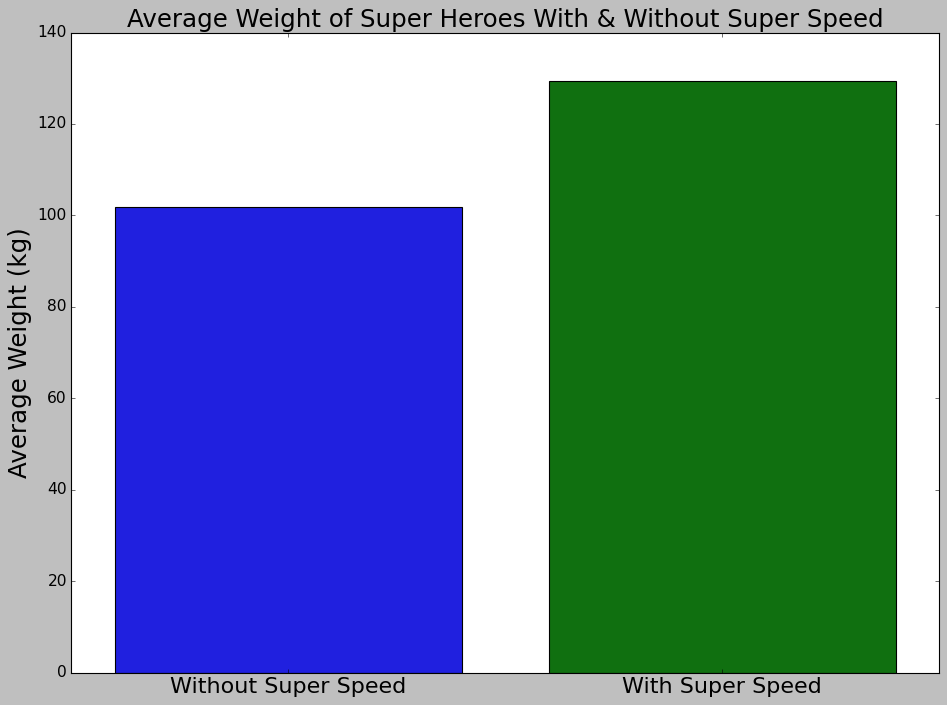

In [38]:
super_speed_grouped = superhero_final.groupby('Super Speed').mean()['Weight (kg)']
super_speed_grouped = super_speed_grouped.reset_index()
super_speed_grouped['Super Speed'] = super_speed_grouped['Super Speed'].replace({True:"With Super Speed", False:"Without Super Speed"})

plt.figure(figsize = (14,10))
plt.style.use('classic')
sns.barplot(data = super_speed_grouped, x=super_speed_grouped['Super Speed'], y=super_speed_grouped['Weight (kg)'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)
plt.title('Average Weight of Super Heroes With & Without Super Speed',fontsize=22)
plt.xlabel('')
plt.ylabel('Average Weight (kg)',fontsize=22)
plt.show()

### Data Visualization task 2 - What is the average height of heroes for each publisher?

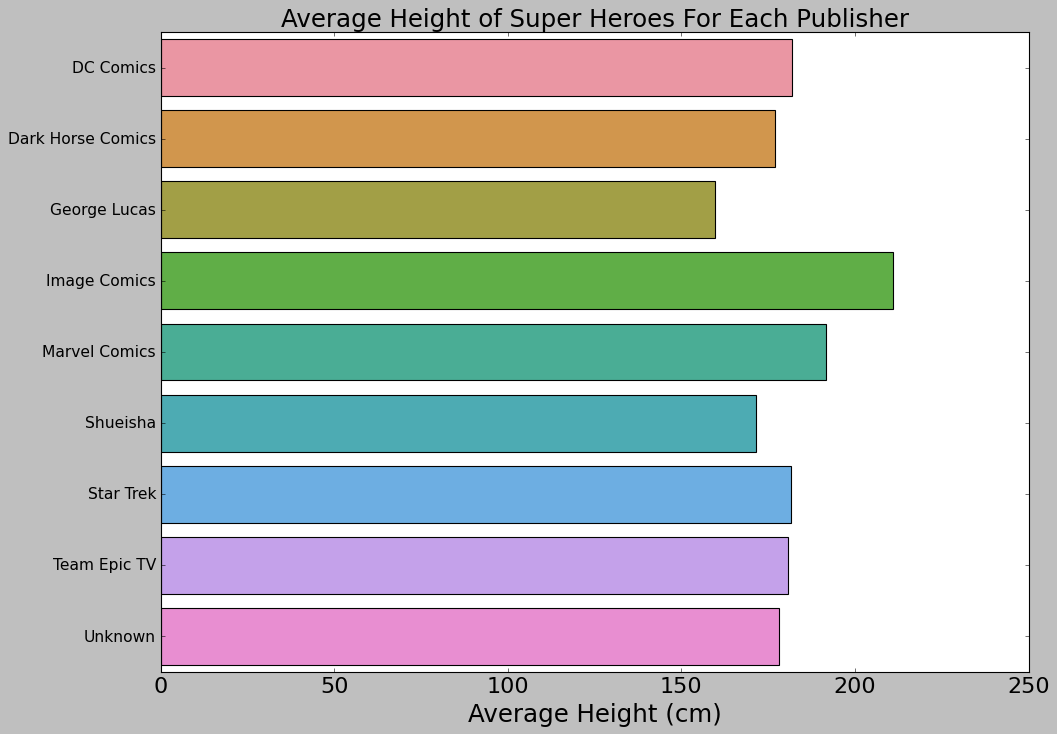

In [42]:
publisher_grouped = superhero_final.groupby('Publisher').mean()['Height (cm)']
publisher_grouped = publisher_grouped.reset_index()

plt.figure(figsize = (14,10))
plt.style.use('classic')
sns.barplot(data = publisher_grouped, x=publisher_grouped['Height (cm)'], y=publisher_grouped['Publisher'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)
plt.title('Average Height of Super Heroes For Each Publisher',fontsize=22)
plt.ylabel('')
plt.xlabel('Average Height (cm)',fontsize=22)
plt.show()